#1.Introducing futures

**Example** An importer in the US who is going to pay £5 million in three months. Let's treat US as domestic and England as foreign, and the exchange rate is quoted in dollars per pound. Assume that today the exchange rate is £1 = 1.25 USD, the domestic interest rate is 1% and the foreign interest rate (in England) is 2%. The following codes show how much we need today in terms of pounds and US dollars:

In [ ]:
import numpy as np

In [ ]:

amount=5 #5 millions
r_foreign=0.02 # the foreign interest rate, 2%
T=3./12. # maturity in years
exchangeRateToday=1.25
fv = 5 # future value
poundToday=fv*np.exp(-r_foreign*T)
print("Pound needed today=", poundToday)
usToday=exchangeRateToday*poundToday
print("US dollar needed today", usToday)

Pound needed today= 4.975062395963412
US dollar needed today 6.218827994954265


In [ ]:
!pip install numpy_financial

In [ ]:
## Altatively, we can use numpy_financial to calculate present value (in domestic currency)
import numpy_financial as npf
rate = 0.02 # the foreign interest rate, 2%
nper = 3./12. #maturity in years
fv=5 # future value
pv = npf.pv(rate, nper, pmt=0, fv=5)

exchangeRateToday=1.25
poundToday = -1*pv
usToday = exchangeRateToday*poundToday
print("Pound needed today=", poundToday)
print("US dollar needed today", usToday)



Pound needed today= 4.975307887399216
US dollar needed today 6.219134859249021


**Future Exchange Rate**

**Example (cont)** If the importer has no pounds, they could long a future contract (or a few future contracts) to purchase pounds in three months with a fixed exchange rate determined today. The forward rate (future exchange rate) is given here:

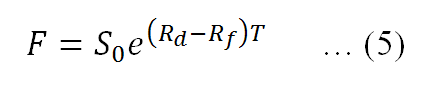

Here,

$F$ is the future price (in this case future exchange rate determined today)

$S_0$ is the spot price (in this case today's exchange rate)

$R_d$ is the domestic risk-free rate compounded continuously

$R_f$ is the foreign deposit rate compounded continuously

$T$ is the maturity in years.


In [ ]:
def futuresExchangeRate(s0,rateDomestic,rateForeign,T):
  futureEx=s0*np.exp((rateDomestic-rateForeign)*T)
  return futureEx

In [ ]:
s0=1.25 #today's exchange rate (£1 = 1.25 USD)
rHome=0.01 #domestic risk-free rate (US)
rForeigh=0.02 #foreign deposit rate (UK)
T=3/12
T

0.25

In [ ]:
s0=1.25 #today's exchange rate (£1 = 1.25 USD)
rHome=0.01 #domestic risk-free rate (US)
rForeigh=0.02 #foreign deposit rate (UK)
T=3./12

future_rate=futuresExchangeRate(s0,rHome,rForeigh,T)

print("future rate=",future_rate)

future rate= 1.246878902996825


**Example**  
If the future exchange rate is not 1.246879, we would have an arbitrate opportunity.

The arbitrage strategy: borrow \$1.25 (USD) and sell one pound in three months with a future price of \$1.26.  The interest rate in USA is 1% and the interest rate in England is 2%. The
At the end of three months, here is the profit of our arbitrage.


In [ ]:
obligationForeign = 1.0 # how much to pay in 3 months (in pounds)
f= 1.26 # future price (future exchange rate)
s0=1.25 # today's exchange rate (£1 = 1.25 USD)
rHome= 0.01 # in USA
rForeign=0.02 #in England
T=3./12. #maturity period

todayObligationForeign=obligationForeign*np.exp(-rForeign*T) #present value of 1 pound in the next 3 months
print("PV of 1 pound =", todayObligationForeign)
usBorrow=todayObligationForeign*s0 #exchange that pv amount to USD
print("usBorrow = ",usBorrow)
costDollarBorrow=usBorrow*np.exp(rHome*T) # future value of USD if we deposit it in USD now
print("costDollarBorrow =",costDollarBorrow)

profit=f*obligationForeign-costDollarBorrow # short future vs deposit
print("profit in USD =", profit)

PV of 1 pound = 0.9950124791926823
usBorrow =  1.243765598990853
costDollarBorrow = 1.2468789029968252
profit in USD = 0.013121097003174764


**Number of Futures Contacts**

Assume that a mutual fund
manager is worried about the market's potential negative movement in a short
term. Assume further that his/her portfolio is positively correlated with the market
portfolio, such as S&P500 index. Thus, he/she should short futures on S&P500. Here
is a related formula:

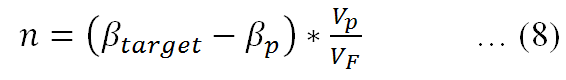

Where,

$n$ is the number of futures contracts to long or short

$β_{target}$ is the target beta

$β_p$ is the beta of our current portfolio

$V_p$ is the value of the portfolio

$V_F$ is the value of one futures contract.

If $n$ is less (bigger) than zero, it means a short (long)
position.


**Example**  Assume John Doe is managing a portfolio worth \$50
million today and his portfolio has a beta of 1.10 with S&P500. He is worried that the
market might go down in the next six months. It is not feasible to sell his portfolio or
part of it because of the transaction costs. Assume that in the short term, his target
beta is zero. For each point of S&P500, the price is \$250. Since today's S&P500 is
2297.42, the value of one futures contract is \$574,355. The number of contracts John
should short (or long) is given here:

In [ ]:
todaySP500index=2297.42
valuePortfolio=50e6
betaPortfolio= 1.1
betaTarget=0

priceEachPoint=250
valueFuture=todaySP500index*priceEachPoint
n=(betaTarget-betaPortfolio)*(valuePortfolio/valueFuture) #The negative sign signifies that the position is a short sale of futures contracts.
print("Number of contracts SP500 futures=",n)

Number of contracts SP500 futures= -95.75959119359977


**Example (cont)** The following program shows the profit or loss
with and without hedging when the S&P500 index level falls 97 points

In [ ]:
sp500indexToday=2297.42
valuePortfolio=50e6
betaPortfolio=1.1
betaTarget=0
sp500indexNmonthsLater=2200.0 #S&P500 index level falls 97 points

#
priceEachPoint=250
valueFuture=sp500indexToday*priceEachPoint
n=(betaTarget-betaPortfolio)*valuePortfolio/valueFuture
mySign=np.sign(n)
n2=mySign*np.ceil(abs(n))#to round up with a negative sign
print("Number of contracts=",n2)

# hedging result
lossFromPortfolio=valuePortfolio*(sp500indexNmonthsLater-sp500indexToday)/sp500indexToday # value*relative_change
gainFromFutures=n2*(sp500indexNmonthsLater-sp500indexToday)*priceEachPoint #with hedging - after shorting 96 S&P500 futures contracts
net=gainFromFutures+lossFromPortfolio
print("Loss from portfolio=", lossFromPortfolio)
print("Gain from futures contract=", gainFromFutures)
print("Net=", net)


Number of contracts= -96.0
Loss from portfolio= -2120204.403200113
Gain from futures contract= 2338080.000000002
Net= 217875.59679988865


#2.Payoff and profit/loss functions for call and put options

* An option gives its buyer the right to buy (call option) or sell (put option) something
in the future to the option seller at a predetermined price (exercise price).

**Payoff for a call option**

Payoff on maturity day can be calculated using the following formula:

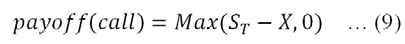

Parameters:
* s_t: This is the price of the underlying asset (like a stock) at the maturity date of the option.
* x: This is the exercise price of the option, which is the price at which the holder has the right to buy the asset.

Understanding the Formula

* If the stock price at maturity (s_t) is higher than the exercise price (x), the payoff is s_t - x.
* If the stock price at maturity (s_t) is lower than or equal to the exercise price (x), the payoff is 0, because exercising the option would not be profitable.

In [ ]:
# s_t = the price at the maturity date t
# x = the exercise price
def payoff_call(s_t,x):
  return max(s_t-x,0)

**Example**

If we buy a European call option to acquire a stock for \$30 in the next 3 months. Assume that three months later the stock price is \$25.  We would not exercise our call option to pay \$30 in exchange for the stock since we could buy the
same stock with $25 in the open market.

In [ ]:
s_t = 25
x = 30
payoff_call(s_t,x)

0

**Example (cont)** On the other hand, if the stock price is \$40, we will exercise our right to reap a payoff of $10.

In [ ]:
s_t = 40
x = 30
payoff_call(s_t,x)

10

**A graph to compare stock price vs payoff for a call at the exercise price $30.**

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
s_t = np.arange(10,80,5) #an array of stock prices
s_t

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

In [ ]:
x=30
dif = s_t-x
dif

array([-20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,  40,
        45])

In [ ]:
payoff=np.maximum(s_t-x,np.zeros(len(s_t)))
payoff

array([ 0.,  0.,  0.,  0.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.,
       45.])

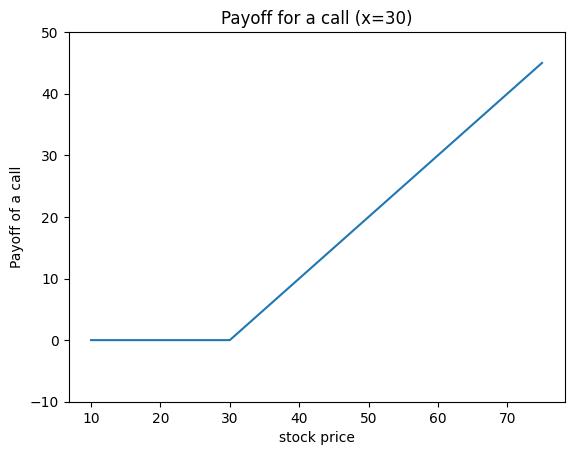

In [ ]:
s_t = np.arange(10,80,5) #an array of stock prices
x = 30 #exercise price
# payoff values for all stock prices
payoff=np.maximum(s_t-x,np.zeros(len(s_t)))

plt.ylim(-10,50) #y values
plt.plot(s_t,payoff)
plt.title("Payoff for a call (x=30)")
plt.xlabel("stock price")
plt.ylabel("Payoff of a call")
plt.show()

**Profit/loss for call option buyer and seller**

The payoff for a call option seller is the opposite of its buyer. If the call premium (option price) is $c$, the profit/loss function for a call option buyer and seller are below:

For a call option buyer:

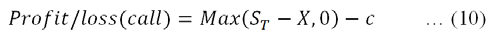


For a call option seller:

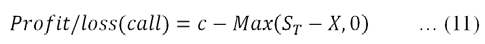

The following graph shows the profit/loss functions for call option buyer and seller:

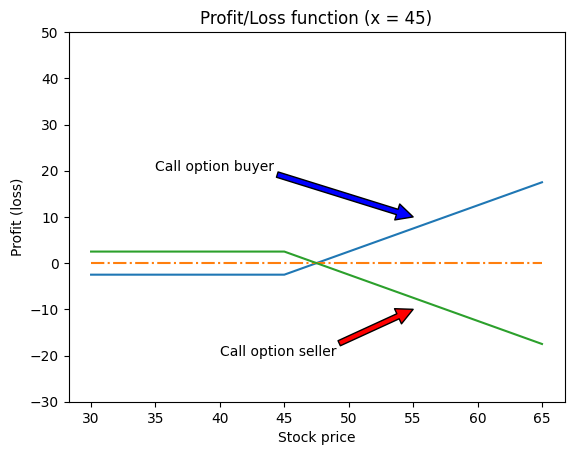

In [ ]:
s_t = np.arange(30,70,5) #simulated stock price from 30 - 70
x=45 # exercise price
c=2.5 # option price
y = np.maximum(s_t-x,np.zeros(len(s_t))) -c # profit/loss for buyer
y2=np.zeros(len(s_t)) #baseline (zero profit)
plt.ylim(-30,50) #set the y-limits
plt.plot(s_t,y) # profit/loss for buyer
plt.plot(s_t,y2,'-.')
plt.plot(s_t,-y) # profit/loss for seller
plt.title("Profit/Loss function (x = 45)")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Call option buyer', xy=(55,10), xytext=(35,20),
arrowprops=dict(facecolor='blue' ),) #xy = the end point to annotate, xytext = position to place the text at, arrowprops = draw an arrow between the positions xy and xytext.
plt.annotate('Call option seller', xy=(55,-10), xytext=(40,-20),
arrowprops=dict(facecolor='red' ),)
plt.show()

**Payoff for a put option**

A put option gives its buyer a right to sell a security (commodity) to the put option
buyer in the future at a predetermined price, X. Here is its payoff function:

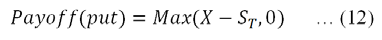

For a put option buyer, the profit/loss function is given here:

image.png

The profit/loss function for a put option seller is just the opposite:

image.png



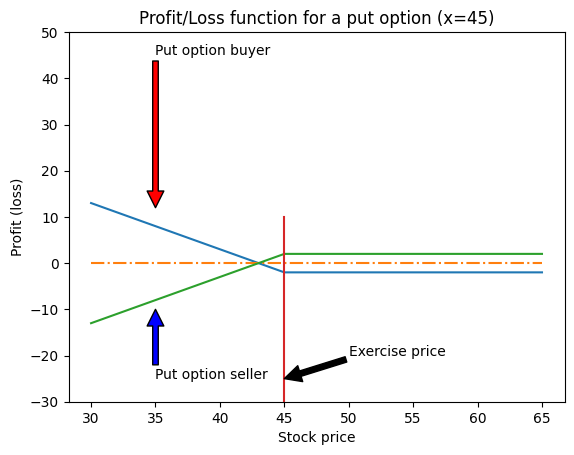

In [ ]:
s_t = np.arange(30,70,5)
x = 45;p=2
y = np.maximum(x-s_t,np.zeros(len(s_t)))-p # profit/loss for buyer
y2 = np.zeros(len(s_t))
x3=[x, x] # To make a line for the exercise price
y3=[-30,10] # To make a line for the exercise price
plt.ylim(-30,50)
plt.plot(s_t,y) # profit/loss for buyer
plt.plot(s_t,y2,'-.') # baseline
plt.plot(s_t,-y) # profit/loss for seller
plt.plot(x3,y3) # the exercise price line
plt.title("Profit/Loss function for a put option (x=45)")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Put option buyer', xy=(35,12), xytext=(35,45), arrowprops=dict(facecolor='red' ),)
plt.annotate('Put option seller', xy=(35,-10), xytext=(35,-25), arrowprops=dict(facecolor='blue' ),)
plt.annotate('Exercise price', xy=(45,-25), xytext=(50,-20), arrowprops=dict(facecolor='black' ),)
plt.show()

#3.European versus American options
* A European option can be exercised only on maturity day, while an American option
can be exercised any time before or on its maturity day.
* Since an American option
could be held until it matures, its price (option premium) should be higher than or
equal to its European counterpart:

 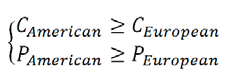

##Black-Scholes-Merton option model on non-dividend paying stocks

The Black-Scholes-Merton option model is a closed-form solution to price a European option on a stock which does not pay any dividends before its maturity date. The closed-form formulae for a European call (c) and put (p) are:

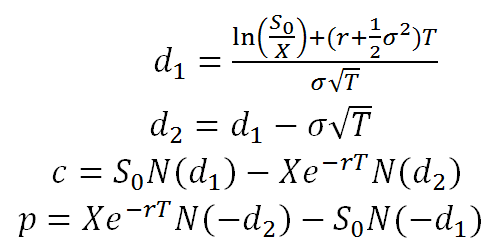  


Where
* $S_0$ is the price today
* $X$ is the exercise price
* $r$ is the continuously compounded risk-free rate
* $T$ is the maturity in years
* $\sigma$ is the volatility of the stock (%)
* $N(d)$ is the cumulative distribution function. It calculates the   probability that a normally distributed random variable will be less than or equal to $d$.

The following Python
codes represent the preceding equations to evaluate a **European call**:

In [ ]:
from numpy.lib.scimath import log, sqrt
from scipy import stats

In [ ]:
def bs_call(S0,X,T,r,sigma):
  d1=(log(S0/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
  d2 = d1-sigma*sqrt(T)
  # the stats.norm.cdf() is the cumulative normal distribution, that is, N() in the Black-Scholes-Merton option model
  c = S0*stats.norm.cdf(d1)-X*np.exp(-r*T)*stats.norm.cdf(d2)
  return c

**Example**

The current stock price is \$40, the strike price is \$42, the time to maturity is six months, the risk-free rate is 1.5% compounded continuously, and the volatility of the underlying stock is
20% (compounded continuously). Based on the preceding codes, the European call is
worth $1.56:

In [ ]:
c=bs_call(S0=40.,X=42.,T=0.5,r=0.015,sigma=0.2)
print("Price =", round(c,4))

Price = 1.5566


**Exercise 1**

Implement a function to calculate the price of a European put in the previous example.

*Expected result:  Price = 3.2428*

In [ ]:
from numpy.lib.scimath import log, sqrt
from scipy import stats

## Define a function here
def bs_put(S0,X,T,r,sigma):
  d1=(log(S0/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
  d2 = d1-sigma*sqrt(T)
  # the stats.norm.cdf() is the cumulative normal distribution, that is, N() in the Black-Scholes-Merton option model
  p = X*np.exp(-r*T)*stats.norm.cdf(-d2)-S0*stats.norm.cdf(-d1)
  return p

## Calculate the price using the predefined bs_put()
p=bs_put(S0=40.,X=42.,T=0.5,r=0.015,sigma=0.2)
print("Price =", round(p,4))

Price = 3.2428


##European options with known dividends

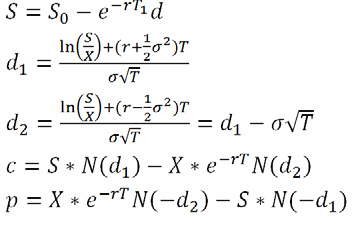

Where
* $S$ is the adjusted stock price

**Example (cont)**

If we have a known dividend of \$1.5 delivered in one month, what is the price of the call?

In [5]:
import numpy as np

def bs_call_div(S0,X,T,T1,r,sigma):
    s = s0-(np.exp(-r*T1)*d) # the adjusted stock price
    d1 = (log(S0/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    # the stats.norm.cdf() is the cumulative normal distribution, that is, N() in the Black-Scholes-Merton option model
    c = S0*stats.norm.cdf(d1)-X*np.exp(-r*T)*stats.norm.cdf(d2)
    return c

s0 = 40  # the current stock price
d = 1.5 # dividend
r = 0.015
T = 6/12
T1 = 1/12
x = 42 # the strike price
sigma = 0.2
p = round(bs_call_div(s0,x,T,T1,r,sigma),2)
print("Call Price =", p)

Call Price = 1.56


**Exercise 2**

Implement a function to calculate the price of a European put with known dividends and calculate the price of a European put in the previous example.



In [9]:
import numpy as np

## Define a function here
def bs_put_div(S0,X,T,T1,r,sigma):
    S = S0-(np.exp(-r*T1)*d)
    d1 = (log(S0/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    p = X*np.exp(-r*T)*stats.norm.cdf(-d2)-S0*stats.norm.cdf(-d1)
    return p

## Calculate the price using the predefined bs_put_div()
s0 = 40  # the current stock price
d = 1.5 # dividend
r = 0.015
T = 6/12
T1 = 1/12
x = 42 # the strike price
sigma = 0.2
p = round(bs_put_div(s0,x,T,T1,r,sigma),2)
print("Put Price =", p)

Put Price = 3.24


#4.Various trading strategies
This section covers some of the commonly used trading strategies involving various types of options.
* **Covered-call** – long a stock and short a call
* **Straddle** – buy a call and a put with the same exercise prices
* **Butterfly with calls** - buy two calls and sell two calls

##Covered-call – long a stock and short a call

Assume that we purchase 100 shares of stock A, with a price of \$10 each. Thus, the
total cost is \$1,000. If at the same time we write a call contract, one contract is worth
100 shares, at a price of $20. Thus, our total cost will be reduced by \$20. Assume
further that the exercise price is \$15. The graphic presentation of our profit and loss
function is given here:

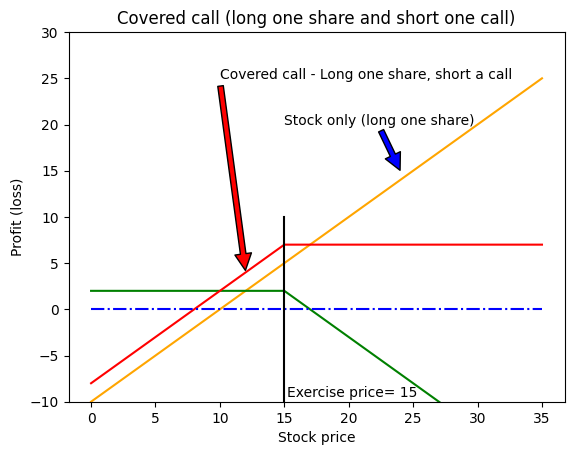

In [ ]:
sT = np.arange(0,40,5) # stock prices at time t=T
k=15 # exercise price
s0=10 # stock price at time t=0
c=2 # call price per contract
y0=np.zeros(len(sT))
y1= sT-s0 # profit/loss from stock only
y2= c-np.maximum(sT-k,np.zeros(len(sT)))   # profit/loss from a call
y3=y1+y2 # covered-call
plt.ylim(-10,30)
plt.plot(sT,y1,'orange') #Stock only
plt.plot(sT,y2,'g')  # Call
plt.plot(sT,y3,'red') # Covered call
plt.plot(sT,y0,'b-.') # Exercise price
plt.plot([k,k],[-10,10],'black')
plt.title('Covered call (long one share and short one call)')
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Stock only (long one share)', xy=(24,15),xytext=(15,20),
arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Covered call - Long one share, short a call', xy=(12,4), xytext=(10,25),
arrowprops=dict(facecolor='red',shrink=0.01),)
plt.annotate('Exercise price= '+str(k), xy=(k+0.2,-10+0.5))
plt.show()

The preceding graph shows that when the stock price is under $17 (15 +2), the covered-call is better than long a share.

##Straddle – buy a call and a put with the same exercise prices

Let's look at the simplest scenario. A firm faces an uncertain event next month. The
issue is that we are not sure about its direction, that is, a good event or bad one. To
take advantage of such an opportunity, we could buy a call and buy a put with the
same exercise prices. This means that we will benefit either way: the stock moves up
or down. Assume further that the exercise price is $50. The payoff of such a strategy
is given here:

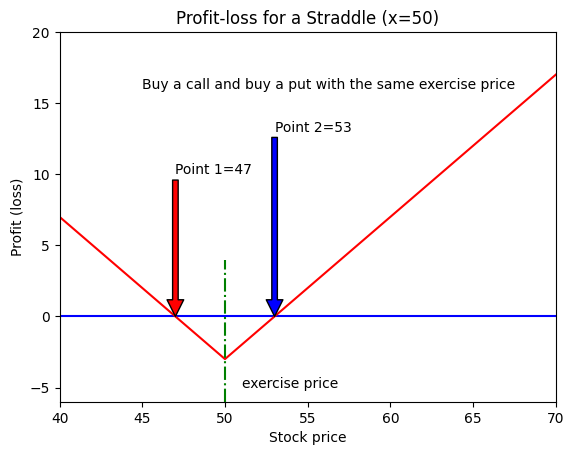

In [ ]:
sT = np.arange(30,80,5)
x=50; c=2; p=1
y0=np.zeros(len(sT))
y1 = np.maximum(sT-x,y0)-c  # profit/loss from a call
y2 = np.maximum(x-sT,y0)-p # profit/loss from a put
straddle= y1+y2
plt.ylim(-6,20)
plt.xlim(40,70)
plt.plot(sT,y0,'b') # Baseline
plt.plot(sT,straddle,'r') # Straddle
plt.plot([x,x],[-6,4],'g-.') # Exercise price
plt.title("Profit-loss for a Straddle (x=50)")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
## Lower breakeven = exercise price – debit paid
plt.annotate('Point 1='+str(x-c-p), xy=(x-p-c,0), xytext=(x-p-c,10),arrowprops=dict(facecolor='red'),)
## Upper breakeven = exercise price + debit paid
plt.annotate('Point 2='+str(x+c+p), xy=(x+p+c,0), xytext=(x+p+c,13),arrowprops=dict(facecolor='blue'),)
plt.annotate('exercise price', xy=(x+1,-5))
plt.annotate('Buy a call and buy a put with the same exercise price',xy=(45,16))
plt.show()

The preceding graph shows whichever way the stock goes, we would profit. Could
we lose? Obviously, when the stock does not change much, our expectation fails to
materialize.

##Butterfly with calls

When buying two calls with the exercises price of $x1$ and $x3$ and selling two calls
with the exercise price of $x2$, where $x2=(x1+x3)/2$, with the same maturity for the
same stock, we call it a butterfly. Its profit-loss function is shown here:

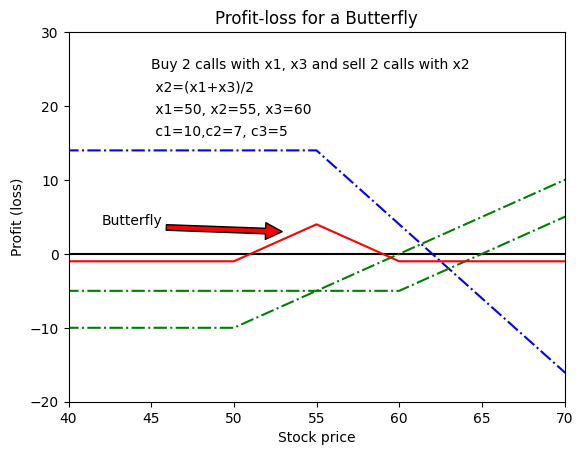

In [ ]:
sT = np.arange(30,80,5)
x1=50; c1=10
x2=55; c2=7
x3=60; c3=5
y0 = np.zeros(len(sT))
y1= np.maximum(sT-x1,y0)-c1
y2= np.maximum(sT-x2,y0)-c2
y3= np.maximum(sT-x3,y0)-c3

butter_fly=y1+y3-2*y2 ## buy one y1 and y3 and sell 2 y2
y0=np.zeros(len(sT))
plt.ylim(-20,30)
plt.xlim(40,70)
plt.plot(sT,y0, 'black') # baseline
plt.plot(sT,y1, '-.g') # long call
plt.plot(sT,-2*y2,'-.b') # 2 short calls
plt.plot(sT,y3,'-.g') # long call
plt.plot(sT,butter_fly,'r')
plt.title("Profit-loss for a Butterfly")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Butterfly', xy=(53,3), xytext=(42,4), arrowprops=dict(facecolor='red',shrink=0.01),)
plt.annotate('Buy 2 calls with x1, x3 and sell 2 calls with x2', xy=(45,25))
plt.annotate(' x2=(x1+x3)/2', xy=(45,22))
plt.annotate(' x1=50, x2=55, x3=60',xy=(45,19))
plt.annotate(' c1=10,c2=7, c3=5', xy=(45,16))
plt.show()

##The relationship between input values and option values


When the volatility of an underlying stock increases, both its call and put values
increase. The logic is that when a stock becomes more volatile, we have a better
chance to observe extreme values, that is, we have a better chance to exercise our
option. The following Python program shows this relationship:

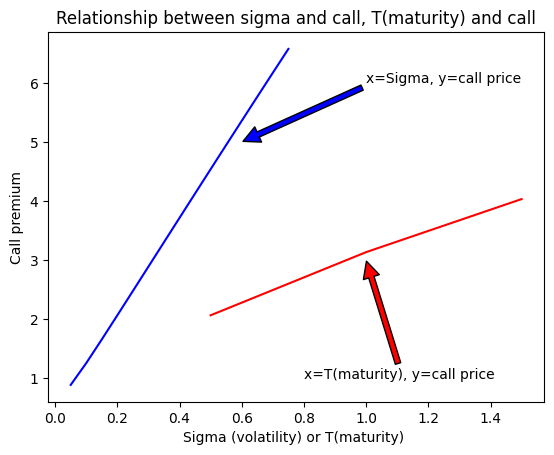

In [ ]:
s0=30
T0=0.5
sigma0=0.2
r0=0.05
x0=30
sigma=np.arange(0.05,0.8,0.05)
T=np.arange(0.5,2.0,0.5)
call_sigma=bs_call(s0,x0,T0,r0,sigma) #call prices at various sigma values
call_T=bs_call(s0,x0,T,r0,sigma0) #call prices at various maturities
plt.title("Relationship between sigma and call, T(maturity) and call")
plt.plot(sigma,call_sigma,'b')
plt.plot(T,call_T,'r')
plt.annotate('x=Sigma, y=call price', xy=(0.6,5), xytext=(1,6), arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('x=T(maturity), y=call price', xy=(1,3), xytext=(0.8,1),
arrowprops=dict(facecolor='red',shrink=0.01),)
plt.ylabel("Call premium")
plt.xlabel("Sigma (volatility) or T(maturity) ")
plt.show()

#5.Put-call parity and its graphic presentation

Based on the no-arbitrage principle, the present values of two portfolios, one with a call option and another one with a put option, should be equal. We call this put-call parity:

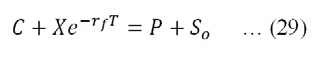

When the stock has known dividend payments before its maturity date, we have the
following equality:

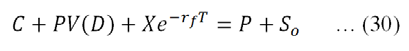

$D$ is the present value of all dividends before their maturity date ($T$).

The
following Python program offers a graphic presentation of the put-call parity:

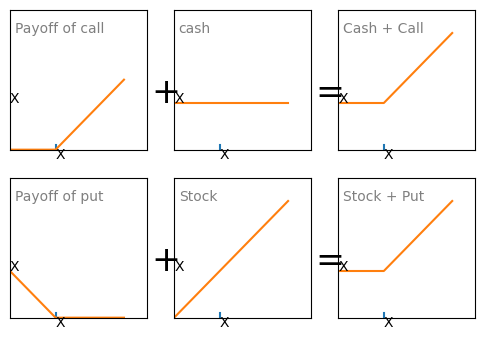

In [ ]:
import pylab as pl
x=10
sT=np.arange(0,30,5)
payoff_call= np.maximum(sT-x,np.zeros(len(sT))) #(abs(sT-x)+sT-x)/2
payoff_put= np.maximum(x-sT, np.zeros(len(sT))) # (abs(x-sT)+x-sT)/2
cash=np.zeros(len(sT))+x
def graph(text,x,text2=''): # Set a template for each subplot
  # x = exercise price
  pl.xticks(())
  pl.yticks(())
  pl.xlim(0,30) #stock price
  pl.ylim(0,30) #currency unit
  pl.plot([x,x],[0,1]) #the vertical line at X on x-axis
  pl.text(x,-2,"X")  # mark 'X' at the exercise price x on the x-axis (and a bit lower than 0 on the y-axis)
  pl.text(0,x,"X") # mark 'X' at the exercise price x on the y-axis
  pl.text(1,x*2.5, text, ha='left' ,size=10, alpha=.5)
  pl.text(-5,10,text2,size=25) #put the '+' and '=' signs on the left of a

pl.figure(figsize=(6, 4)) #Create a new figure
pl.subplot(2, 3, 1); graph('Payoff of call',x); pl.plot(sT,payoff_call) #subplot = Add an Axes to the current figure
pl.subplot(2, 3, 2); graph('cash',x,'+'); pl.plot(sT,cash)
pl.subplot(2, 3, 3); graph('Cash + Call ',x,'=');
pl.plot(sT,cash+payoff_call)
pl.subplot(2, 3, 4); graph('Payoff of put ',x); pl.plot(sT,payoff_put)
pl.subplot(2, 3, 5); graph('Stock',x,'+'); pl.plot(sT,sT)
pl.subplot(2, 3, 6); graph('Stock + Put',x,'='); pl.plot(sT,sT+payoff_put)
pl.show()

**The trends of a call-put ratio**

The put-call ratio represents the perception of investors jointly towards the future. If
there is no obvious trend, that is, we expect a normal future, then the put-call ratio
should be close to one. On the other hand, if we expect a much brighter future, the
ratio should be lower than one.

The following code shows a ratio of this type over the years. First, we have to
download the data from CBOE.

Perform the following steps:
1. Go to http://www.cboe.com/data/putcallratio.aspx.
4. Click on  [CBOE Total Exchange Volume and Put/Call Ratios](https://cdn.cboe.com/resources/options/volume_and_call_put_ratios/totalpc.csv)  (11-01-2006 to 10-04-2019) under Recent.




In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


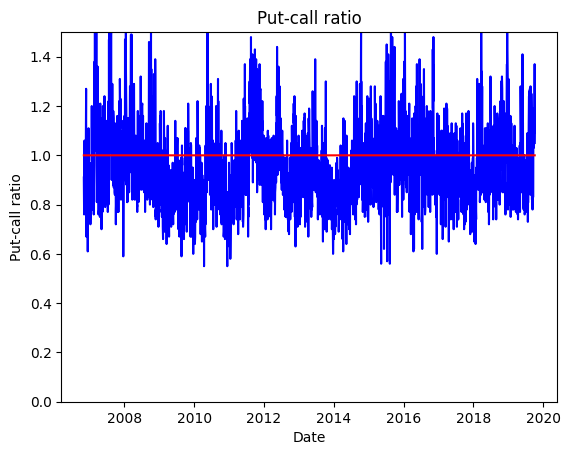

In [ ]:
infile='/content/drive/MyDrive/Financial Engineering Python/data/totalpc.csv'
data=pd.read_csv(infile,skiprows=2,index_col=0,parse_dates=True)
data.columns=('Calls','Puts','Total','Ratio')
x=data.index #Date
y=data.Ratio
ratio1=np.ones(len(y))# For reference (ratio = 1)
plt.title('Put-call ratio')
plt.xlabel('Date')
plt.ylabel('Put-call ratio')
plt.ylim(0,1.5)
plt.plot(x, y, 'b-')
plt.plot(x, ratio1,'r')
plt.show()

**The put-call ratio for a short period with
a trend**

Based on the preceding program, we could choose a shorter period with a trend, as
shown in the following code:

In [ ]:
from datetime import datetime
import statsmodels.api as sm

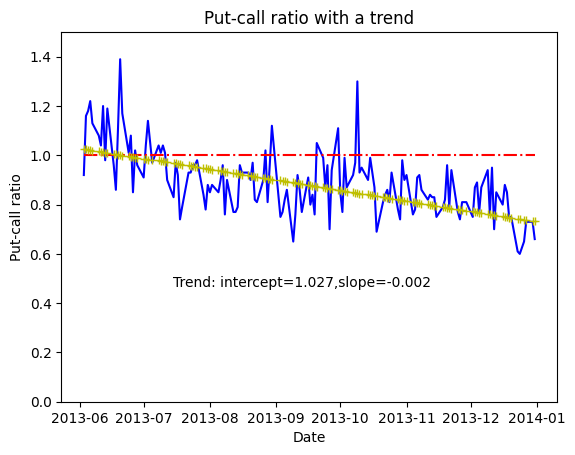

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Financial Engineering Python/data/totalpc.csv',skiprows=2,index_col=0,parse_dates=True)
data.columns=('Calls','Puts','Total','Ratio')
begdate=datetime(2013,6, 1) #from June 1,2013
enddate=datetime(2013,12,31) #to Dec 31,2013
data2=data[(data.index>=begdate) & (data.index<=enddate)] ## select data
x=data2.index #date
y=data2.Ratio #ratio
lenx=range(len(x))
x2=sm.add_constant(lenx) # Add a constant so we get an alpha
model=sm.OLS(y,x2) # Estimate a trend of the put-call ratio (y) based on dates (x)
results=model.fit()
#print results.summary()
alpha=round(results.params[0],3)
slope=round(results.params[1],3)
predicted_y=alpha+np.dot(slope,lenx) # predicted y from the model
ratio1=np.ones(len(y)) # baseline (ratio = 1)
plt.title('Put-call ratio with a trend')
plt.xlabel('Date')
plt.ylabel('Put-call ratio')
plt.ylim(0,1.5)
plt.plot(x, y, 'b-') #ratio
plt.plot(x, ratio1,'r-.') # baseline
plt.plot(x, predicted_y,'y+') # predicted ratio
plt.figtext(0.3,0.35,'Trend: intercept='+str(alpha)+',slope='+str(slope))
plt.show()

#6.Binomial tree and its graphic presentation

The binomial tree method was proposed by Cox, Ross, and Robinstein in 1979.Because of this, it is also called the CRR method. Based on the CRR method, we have
the following two-step approach. First, we draw a tree, such as the following onestep
tree. Assume that our current stock value is S. Then, there are two outcomes of
Su and Sd, where u>1 and d<1, see the figure below.


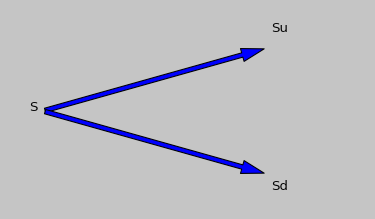

**Draw an n-step tree.**

In order to generate an n-step binomial tree, let's see how to draw a n-step tree first.  

In [ ]:
import networkx as nx

In [ ]:
def binomial_grid(n, with_label=False):
  G=nx.Graph() # Create an empty graph/network
  print(G)
  for i in range(0,n+1):
    for j in range(1,i+2):
      if i<n:
        # Add an edge to a graph (will also add 2 nodes --node(i,j) and node(i+1, j) for the edge)
        G.add_edge((i,j),(i+1,j)) # Add an edge between a node u (i,j) and a node v (i+1,j)
        print("Add edges:",(i,j),(i+1,j))
        print("Result: ",G)
        G.add_edge((i,j),(i+1,j+1))
        print("Add edges:",(i,j),(i+1,j+1))
        print("Result: ",G)
  print("Final Graph")
  print(G)
  posG={}
  for node in G.nodes():
    posG[node]=(node[0],n+2+node[0]-2*node[1])
  nx.draw(G,pos=posG, with_labels = with_label)

Graph with 0 nodes and 0 edges
Add edges: (0, 1) (1, 1)
Result:  Graph with 2 nodes and 1 edges
Add edges: (0, 1) (1, 2)
Result:  Graph with 3 nodes and 2 edges
Add edges: (1, 1) (2, 1)
Result:  Graph with 4 nodes and 3 edges
Add edges: (1, 1) (2, 2)
Result:  Graph with 5 nodes and 4 edges
Add edges: (1, 2) (2, 2)
Result:  Graph with 5 nodes and 5 edges
Add edges: (1, 2) (2, 3)
Result:  Graph with 6 nodes and 6 edges
Final Graph
Graph with 6 nodes and 6 edges


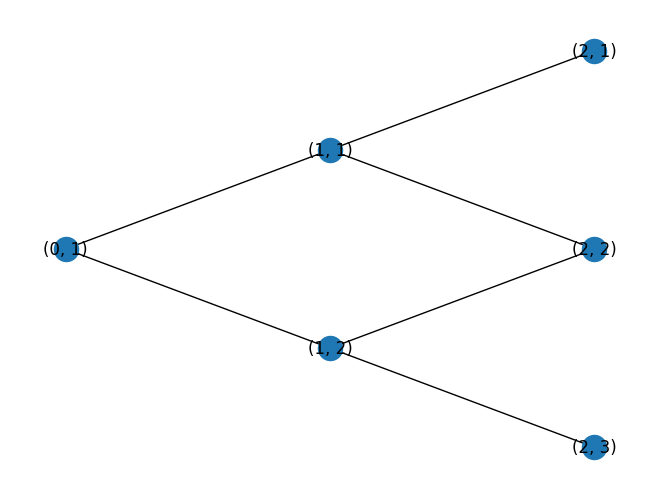

In [ ]:
# n = number of steps.
n=2 # Change the value of n to generate a tree with different number of steps.
binomial_grid(n,with_label=True)

Assume that today's price is $10, the
exercise price is \$11, and a call option will mature in six months. In addition, assume
that we know that the price will have two outcomes: moving up (u=1.1) or moving
down (d=0.9). In other words, the final values are either \$11 or \$9. Based on such
information, we have the following graph showing the prices for such a one-step
binomial tree:

Graph with 0 nodes and 0 edges
Add edges: (0, 1) (1, 1)
Result:  Graph with 2 nodes and 1 edges
Add edges: (0, 1) (1, 2)
Result:  Graph with 3 nodes and 2 edges
Final Graph
Graph with 3 nodes and 2 edges


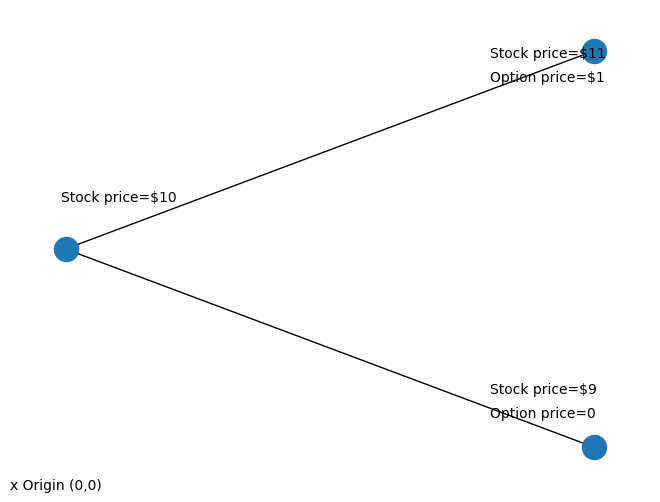

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figtext(0,0, "x Origin (0,0)") ## just add the origin point for reference
#t = 0
plt.figtext(0.08,0.6,"Stock price=$10") #The position to place the text (x,y) and the text
#t = 1
plt.figtext(0.75,0.9,"Stock price=$11") #up
plt.figtext(0.75,0.85,"Option price=$1")
plt.figtext(0.75,0.2,"Stock price=$9") #down
plt.figtext(0.75,0.15,"Option price=0")

n=1
binomial_grid(n)
plt.show()

For a two-step binomial tree, we have the following codes:

Graph with 0 nodes and 0 edges
Add edges: (0, 1) (1, 1)
Result:  Graph with 2 nodes and 1 edges
Add edges: (0, 1) (1, 2)
Result:  Graph with 3 nodes and 2 edges
Add edges: (1, 1) (2, 1)
Result:  Graph with 4 nodes and 3 edges
Add edges: (1, 1) (2, 2)
Result:  Graph with 5 nodes and 4 edges
Add edges: (1, 2) (2, 2)
Result:  Graph with 5 nodes and 5 edges
Add edges: (1, 2) (2, 3)
Result:  Graph with 6 nodes and 6 edges
Final Graph
Graph with 6 nodes and 6 edges


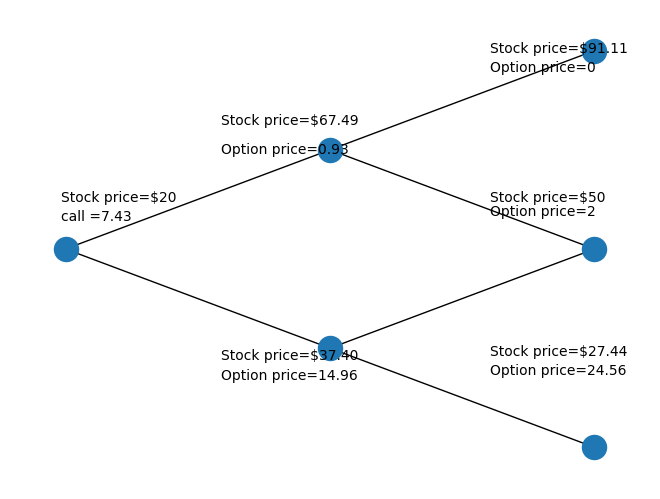

In [ ]:
#t = 0
plt.figtext(0.08,0.6,"Stock price=$20")
plt.figtext(0.08,0.56,"call =7.43")
#t = 1
plt.figtext(0.33,0.76,"Stock price=$67.49") #up
plt.figtext(0.33,0.70,"Option price=0.93")
plt.figtext(0.33,0.27,"Stock price=$37.40") #down
plt.figtext(0.33,0.23,"Option price=14.96")
#t = 2
plt.figtext(0.75,0.91,"Stock price=$91.11")#up
plt.figtext(0.75,0.87,"Option price=0")
plt.figtext(0.75,0.6,"Stock price=$50") #center
plt.figtext(0.75,0.57,"Option price=2")
plt.figtext(0.75,0.28,"Stock price=$27.44")#down
plt.figtext(0.75,0.24,"Option price=24.56")
n=2
binomial_grid(n)

**Example**

Assume that the current stock
price is \$10, the exercise price is \$10, the maturity is three months, the number of
steps is two, the risk-free rate is 2%, and the volatility of the underlying security is
0.2. The formula to calculate $u$ and $d$ are:

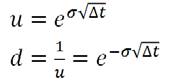

$\Delta t$ is the step, that is $\Delta t = \frac{T}{n}$

The following Python codes would generate a two-step tree:


In [ ]:
import math as math


Graph with 0 nodes and 0 edges
Add edges: (0, 1) (1, 1)
Result:  Graph with 2 nodes and 1 edges
Add edges: (0, 1) (1, 2)
Result:  Graph with 3 nodes and 2 edges
Add edges: (1, 1) (2, 1)
Result:  Graph with 4 nodes and 3 edges
Add edges: (1, 1) (2, 2)
Result:  Graph with 5 nodes and 4 edges
Add edges: (1, 2) (2, 2)
Result:  Graph with 5 nodes and 5 edges
Add edges: (1, 2) (2, 3)
Result:  Graph with 6 nodes and 6 edges
Final Graph
Graph with 6 nodes and 6 edges


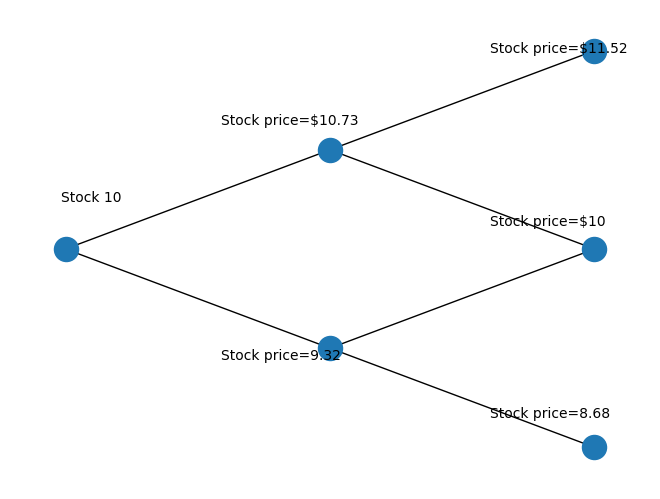

In [ ]:
s=10 #current stock price
x=10 #the exercise price
T=3./12 #the maturity
n=2 #the number of steps
r=0.02 #the risk-free rate  2%
sigma=0.2 # the volatility of the underlying security  0.2.
deltaT=T/n

u=math.exp(sigma*math.sqrt(deltaT))
d=1/u
su=round(s*u,2); #up
suu=round(s*u*u,2) #up-up
sd=round(s*d,2) #down
sdd=round(s*d*d,2) #down-down
sud=s #center (up-down)
plt.figtext(0.08,0.6,'Stock '+str(s))
plt.figtext(0.33,0.76,"Stock price=$"+str(su))
plt.figtext(0.33,0.27,'Stock price='+str(sd))
plt.figtext(0.75,0.91,'Stock price=$'+str(suu))
plt.figtext(0.75,0.55,'Stock price=$'+str(sud))
plt.figtext(0.75,0.15,"Stock price="+str(sdd))
binomial_grid(n)
plt.show()

Now, we use the risk-neutral probability to discount each value one step backward.

The formulas for u, d, p and v are given here:

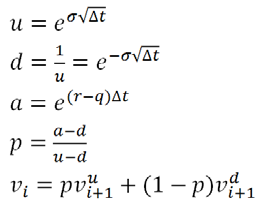

The codes and the graph are given here:

Graph with 0 nodes and 0 edges
Add edges: (0, 1) (1, 1)
Result:  Graph with 2 nodes and 1 edges
Add edges: (0, 1) (1, 2)
Result:  Graph with 3 nodes and 2 edges
Add edges: (1, 1) (2, 1)
Result:  Graph with 4 nodes and 3 edges
Add edges: (1, 1) (2, 2)
Result:  Graph with 5 nodes and 4 edges
Add edges: (1, 2) (2, 2)
Result:  Graph with 5 nodes and 5 edges
Add edges: (1, 2) (2, 3)
Result:  Graph with 6 nodes and 6 edges
Final Graph
Graph with 6 nodes and 6 edges


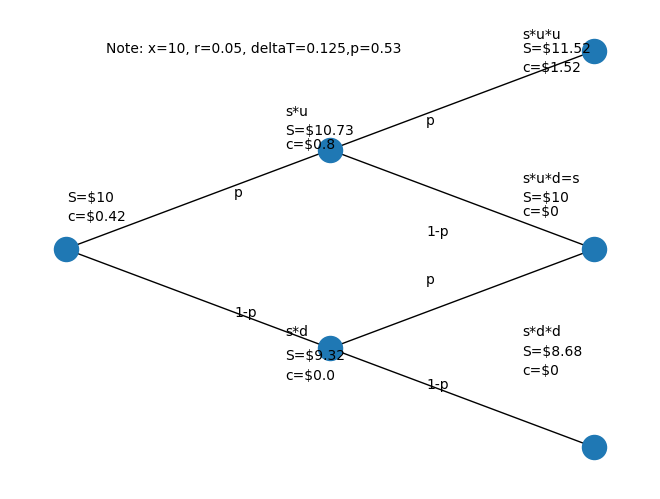

In [ ]:
s=10;x=10;r=0.05;sigma=0.2;T=3./12.;n=2;q=0 # q is dividend yield
deltaT=T/n # step
u=np.exp(sigma*np.sqrt(deltaT))
d=1/u
a=np.exp((r-q)*deltaT)
p=(a-d)/(u-d)

s_dollar='S=$' # a constant text for display on a tree
c_dollar='c=$' # constant text for display on a tree
p2=round(p,2) # just the p rounded to two decimal places

plt.figtext(0.15,0.91,'Note: x='+str(x)+', r='+str(r)+', deltaT='+str(deltaT)+',p='+str(p2))
plt.figtext(0.35,0.61,'p')
plt.figtext(0.65,0.76,'p')
plt.figtext(0.65,0.43,'p')
plt.figtext(0.35,0.36,'1-p')
plt.figtext(0.65,0.53,'1-p')
plt.figtext(0.65,0.21,'1-p')

# Calculate all stock prices
su=round(s*u,2);
suu=round(s*u*u,2)
sd=round(s*d,2);
sdd=round(s*d*d,2)
sud=s

# Calculate the call at level 2 (t=2)
c_suu=round(max(suu-x,0),2)
c_s=round(max(s-x,0),2)
c_sdd=round(max(sdd-x,0),2)
plt.figtext(0.8,0.94,'s*u*u')
plt.figtext(0.8,0.91,s_dollar+str(suu))
plt.figtext(0.8,0.87,c_dollar+str(c_suu))
plt.figtext(0.8,0.64,'s*u*d=s')
plt.figtext(0.8,0.6,s_dollar+str(sud))
plt.figtext(0.8,0.57,c_dollar+str(c_s))
plt.figtext(0.8,0.32,'s*d*d')
plt.figtext(0.8,0.28,s_dollar+str(sdd))
plt.figtext(0.8,0.24,c_dollar+str(c_sdd))

# at level 1 (t=1)
c_su=round((p*c_suu+(1-p)*c_s)*np.exp(-r*deltaT),2)
c_sd=round((p*c_s+(1-p)*c_sdd)*np.exp(-r*deltaT),2)
plt.figtext(0.43,0.78,'s*u')
plt.figtext(0.43,0.74,s_dollar+str(su))
plt.figtext(0.43,0.71,c_dollar+str(c_su))
plt.figtext(0.43,0.32,'s*d')
plt.figtext(0.43,0.27,s_dollar+str(sd))
plt.figtext(0.43,0.23,c_dollar+str(c_sd))

# at level 0 (today, t=0)
c_0=round(p*np.exp(-r*deltaT)*c_su+(1-p)*np.exp(-r*deltaT)*c_sd,2)
plt.figtext(0.09,0.6,s_dollar+str(s))
plt.figtext(0.09,0.56,c_dollar+str(c_0))
binomial_grid(n)

##Binomial tree (CRR) method for European options

In [ ]:
def binomialCallEuropean(s,x,T,r,sigma,n=100):

  deltaT = T /n
  u = math.exp(sigma * sqrt(deltaT))
  d = 1.0 / u
  a = math.exp(r * deltaT)
  p = (a - d) / (u - d)
  v = [[0.0 for j in  range(i + 1)] for i in range(n + 1)]
  for j in np.arange(n+1):
    #payoff at the last step from node (n,1) to (n,n)
    #v[n][j] = s*u^(n - j)*d^j. eg for n=2, j=0 -> v[2][0] = s(2,1) = s*u*u
    v[n][j] = max(s * u**(n - j) * d**j - x, 0.0)
  for i in np.arange(n-1, -1, -1):
    for j in np.arange(i + 1):
      #eg v[1,2] = s(1,1) = p*v[2,2]+(1-p)*v[2,3] = p*s(2,1)+(1-p)*s(2,2)
      v[i][j]= math.exp(-r*deltaT)*(p*v[i+1][j]+(1.0-p)*v[i+1][j+1])

  return v[0][0]

**Example**

For comparison, the result based on the Black-Scholes-Merton option model is shown here.

In [ ]:
# the result based on the Black-Scholes-Merton option model
# s=40,x=42,T=6 months,r=0.1,sigma=0.2
bs_call(40,42,0.5,0.1,0.2)

2.2777803294555348

In [ ]:
# the result based on the Binomial tree (CRR) method
binomialCallEuropean(40,42,0.5,0.1,0.2,1000)

2.278194404573134

##Binomial tree (CRR) method for American options

The key difference between pricing an American call option and pricing a European
is its early exercise opportunity. In the preceding program, the last several lines
reflect this. For each node, we estimate two values: v1 is for the discounted value
and v2 is the payoff from an early exercise. We choose a higher value, max(v1, v2).
If using the same set of values to apply this binomial tree to price an American call,
we have the following value.

In [ ]:
def binomialCallAmerican(s,x,T,r,sigma,n=100):
  deltaT = T /n
  u = math.exp(sigma * sqrt(deltaT))
  d = 1.0 / u
  a = math.exp(r * deltaT)
  p = (a - d) / (u - d)
  v = [[0.0 for j in np.arange(i + 1)] for i in np.arange(n + 1)]
  for j in np.arange(n+1):
    v[n][j] = max(s * u**(n - j) * d**j - x, 0.0)
  for i in np.arange(n-1, -1, -1):
    for j in np.arange(i + 1):
      v1 =math.exp(-r*deltaT)*(p*v[i+1][j]+(1.0-p)*v[i+1][j+1])
      v2=max(v[i][j]-x,0) # early exercise
      v[i][j]=max(v1,v2)
  return v[0][0]

In [ ]:
binomialCallAmerican(40,42,0.5,0.1,0.2,1000)

2.278194404573134

#7.Implied volatility

* From the previous sections, we know that for a set of input variables—S (the present
stock price), X (the exercise price), T (the maturity date in years), r (the continuously
compounded risk-free rate), and sigma (the volatility of the stock, that is, the
annualized standard deviation of its returns)—we could estimate the price of a
call option based on the Black-Scholes-Merton option model.
* On the other hand, if we know S, X, T, r, and c, how can we estimate sigma? Here,
sigma is our implied volatility.

Rhe underlying logic to figure out the implied volatility is very simple: trial and error. The basic design is that after inputting 100 different sigmas, plus the first four input values shown earlier, we have 100 call prices. The implied volatility is the sigma that achieves the smallest absolute difference between the estimated and the actual call price.

In [10]:
import numpy as np

**The implied volatility based on a European call option**

In [11]:
def implied_vol_call(S,X,T,r,c):
  for i in range(200):
    sigma=0.005*(i+1)
    d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    diff=c-(S*stats.norm.cdf(d1)-X*np.exp(-r*T)*stats.norm.cdf(d2))
    if abs(diff)<=0.01: #absolute difference = 0.01
      return i,sigma, diff

In [12]:
# s=40,x=42,T=6 months,r=0.1, c=2.28
implied_vol_call(40,42,0.5,0.1,2.28)

(39, 0.2, 0.0022196705444650355)

**The implied volatility based on a European put option**

Let's use a set of input values to estimate the implied volatility. The conversion
criterion of this function is that an estimated price and the given put price have the smallest
difference. In the previous function, the conversion criterion is when the absolute difference is less than 0.01. In a sense, the current program will guarantee an implied volatility while the previous program does not guarantee an output.


In [13]:
def implied_vol_put_min(S,X,T,r,p):
  implied_vol=1.0
  min_value=100.0
  for i in range(1,10000): # we estimate ln(S/X) 10,000 times
    sigma=0.0001*(i+1)
    d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    put=X*np.exp(-r*T)*stats.norm.cdf(-d2)-S*stats.norm.cdf(-d1)
    abs_diff=abs(put-p)
    if abs_diff<min_value:
      min_value=abs_diff
      implied_vol=sigma
      k=i
    put_out=put
  print ('k, implied_vol, put, abs_diff')
  return k,implied_vol,min_value

In [14]:
#S =40,X=42,T=0.5,r=0.015, p=3.2 (expected sigma=0.2)
implied_vol_put_min(40,42,0.5,0.015,3.2)

k, implied_vol, put, abs_diff


(1960, 0.1961, 0.00015130410043884268)

**Exercise 3**


Estimate the implied volatility for a European put option with S=40, X=40, T=12 months, r=0.1, and the put price is $1.50.

*Expected result*

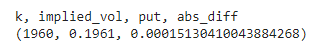

In [15]:
## Write your code here
implied_vol_put_min(40,40,1,0.01,1.5)

k, implied_vol, put, abs_diff


(1065, 0.1066, 0.0002539188478891674)

**Binary-search**

* To estimate the implied volatility, the logic underlying the earlier methods is to
run the Black-Scholes-Merton option model 10,000 times and choose the sigma value
that achieves the smallest difference between the estimated option price and the
observed price.
* Although the logic is easy to understand, such an approach is not efficient since we need to call the Black-Scholes-Merton option model a few hundred times.



The following program shows its application for searching an implied volatility:


In [ ]:
def impliedVolBinary(S,X,T,r,c):
  smallEnough=False
  volLow=0.001
  volHigh=1.0
  cLow= bs_call(S,X,T,r,volLow)
  cHigh= bs_call(S,X,T,r,volHigh)
  # cLow (volLow) -------------------------------cMid---------------------cHigh (volHigh)
  if cLow>c or cHigh<c:
    raise ValueError
  while not smallEnough:
    cLow=bs_call(S,X,T,r,volLow)
    cHigh=bs_call(S,X,T,r,volHigh)
    volMid=(volLow+volHigh)/2.0
    cMid=bs_call(S,X,T,r,volMid)
    if abs(cHigh-cLow)<0.01:
      smallEnough = True #If the difference between cHigh and cLow is small, return the volMid
    elif cMid>c: #If the cMid > actual c, search the left range (smaller sigma values)
      volHigh=volMid
    else: #If the cMid <= actual c, search the right range (bigger sigma values)
      volLow=volMid
  return volMid, cLow, cHigh

In [ ]:
S=42;X=40;T=0.5;r=0.01;c=3.0
print("Vol, cLow, cHigh")
impliedVolBinary(S,X,T,r,c)

Vol, cLow, cHigh


(0.14489892578124997, 2.9908102941296093, 3.0006009007537564)